In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout

In [2]:
data=pd.read_csv('IBM.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,0.618153,387200
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,0.623556,288000
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,0.617343,256000
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,0.605185,363200
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,0.593837,544000


In [4]:
price=data['Close']
price.head()

0    7.626667
1    7.693333
2    7.616667
3    7.466667
4    7.326667
Name: Close, dtype: float64

In [5]:
length=len(price)
train_ratio=0.6
val_ratio=0.2
length_train = round(length * train_ratio)
length_val = round(length * val_ratio)
train_data = price[:length_train]
val_data = price[length_train:length_train+length_val]
test_data = price[length_train+length_val:]
print(len(train_data),len(val_data),len(test_data))

8798 2933 2932


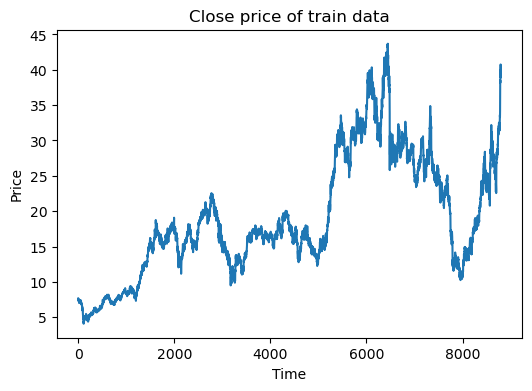

In [6]:
fig1 = plt.figure(figsize=(6,4))
plt.plot(train_data)
plt.title('Close price of train data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [7]:
train_data = np.reshape(train_data.values, (-1,1))
val_data = np.reshape(val_data.values, (-1,1))
test_data = np.reshape(test_data.values, (-1,1))

In [8]:
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train_data)
val_scaled = scaler.fit_transform(val_data)
test_scaled = scaler.fit_transform(test_data)

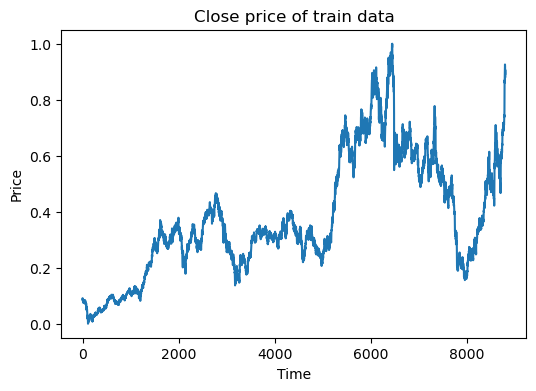

In [9]:
fig2 = plt.figure(figsize=(6,4))
plt.plot(train_scaled)
plt.title('Close price of train data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [10]:
def extract(data,time_step):
    X=[]
    y=[]
    for i in range(len(data)-time_step):
        X.append([j for j in data[i:i+time_step]])
        y.append(data[i+time_step])
    X=np.array(X)
    X=X.reshape(X.shape[0],X.shape[1],1)
    return X,y

In [54]:
time_step=20
X,y=extract(train_scaled,time_step)
X_val,y_val=extract(val_scaled,time_step)

In [55]:
model=Sequential()
model.add(SimpleRNN(units=6,input_shape=(time_step,1),activation='tanh'))
# model.add(Dropout(0.1))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='SGD',loss='mean_squared_error')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 6)                 48        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [56]:
y=np.array(y)
y_val=np.array(y_val)

In [57]:
history=model.fit(X,y,batch_size=50,epochs=50,validation_data=(X_val, y_val))

Epoch 1/50
176/176 [==============================] - 1s 3ms/step - loss: 0.0059 - val_loss: 0.0036
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 9.9540e-04 - val_loss: 0.0018
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 5.2833e-04 - val_loss: 0.0014
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 4.4334e-04 - val_loss: 0.0013
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 3.9888e-04 - val_loss: 0.0012
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 3.6981e-04 - val_loss: 0.0012
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 3.4883e-04 - val_loss: 0.0011
Epoch 8/50
176/176 [==============================] - 0s 3ms/step - loss: 3.3333e-04 - val_loss: 0.0011
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 3.2025e-04 - val_loss: 0.0011
Epoch 10/50
176/176 [==============================] - 0s 2ms/step -

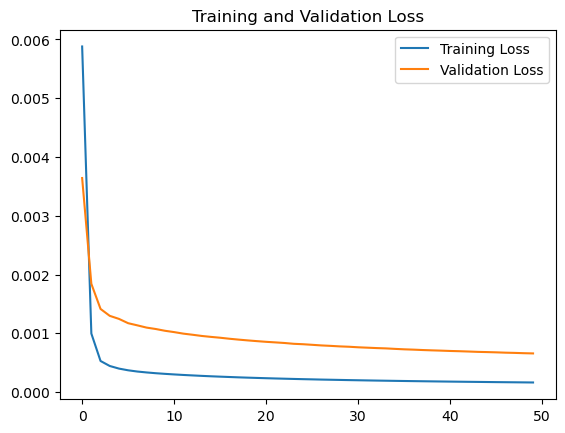

In [58]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [59]:
train_predict=model.predict(X)

275/275 [==============================] - 0s 891us/step


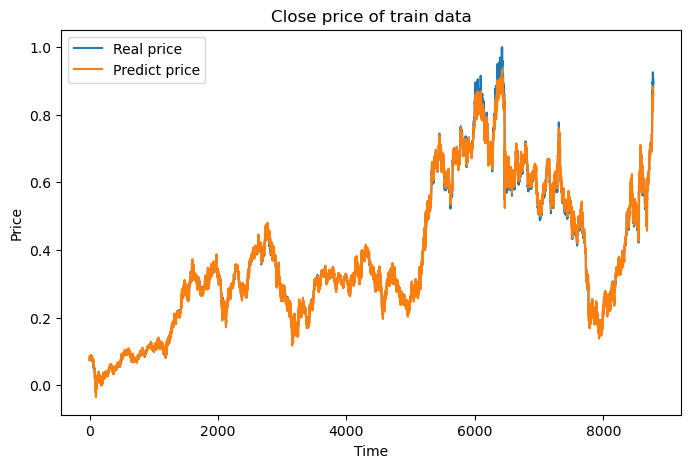

In [60]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(y,label='Real price')
plt.plot(train_predict,label='Predict price')
plt.title('Close price of train data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Testing

In [61]:
X_test,y_test=extract(test_scaled,time_step)
y_test=np.array(y_test)
test_predict=model.predict(X_test)

91/91 [==============================] - 0s 1ms/step


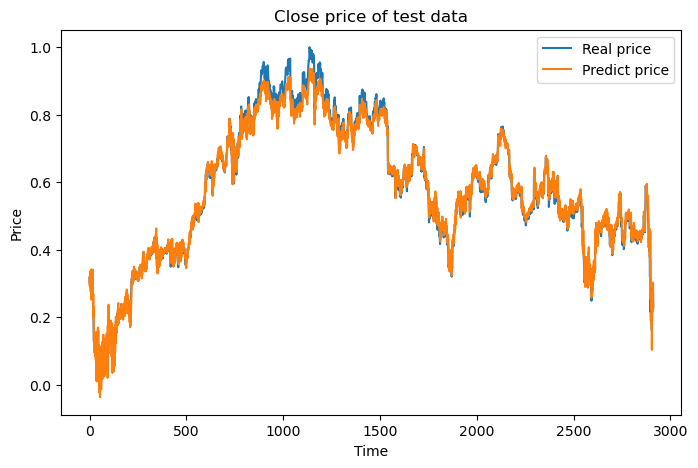

In [62]:
fig4 = plt.figure(figsize=(8,5))
plt.plot(y_test,label='Real price')
plt.plot(test_predict,label='Predict price')
plt.title('Close price of test data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()